<a href="https://colab.research.google.com/github/s10955031/bigdata/blob/main/0323_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2")
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(SportsAnalytics)

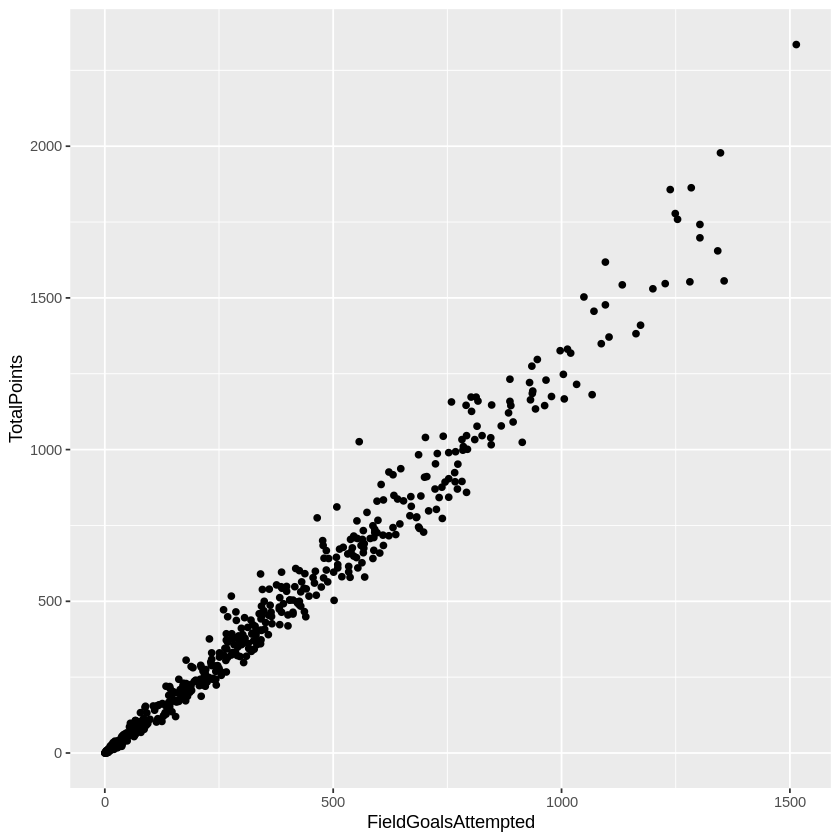

In [5]:
NBA1920 <- fetch_NBAPlayerStatistics("19-20")
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1920)

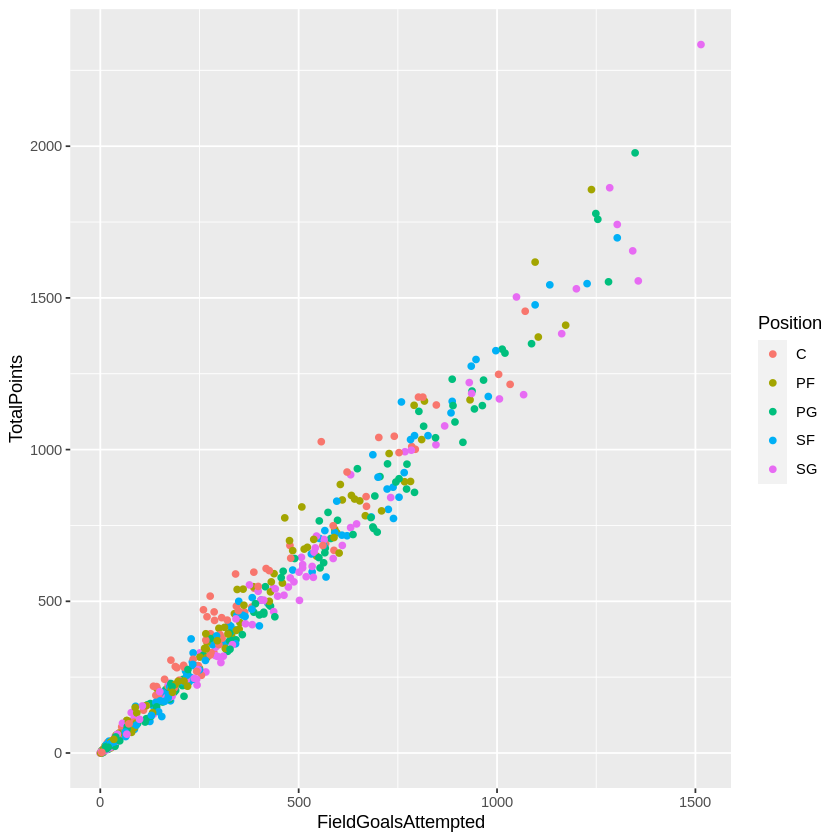

In [6]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1920,color=Position)

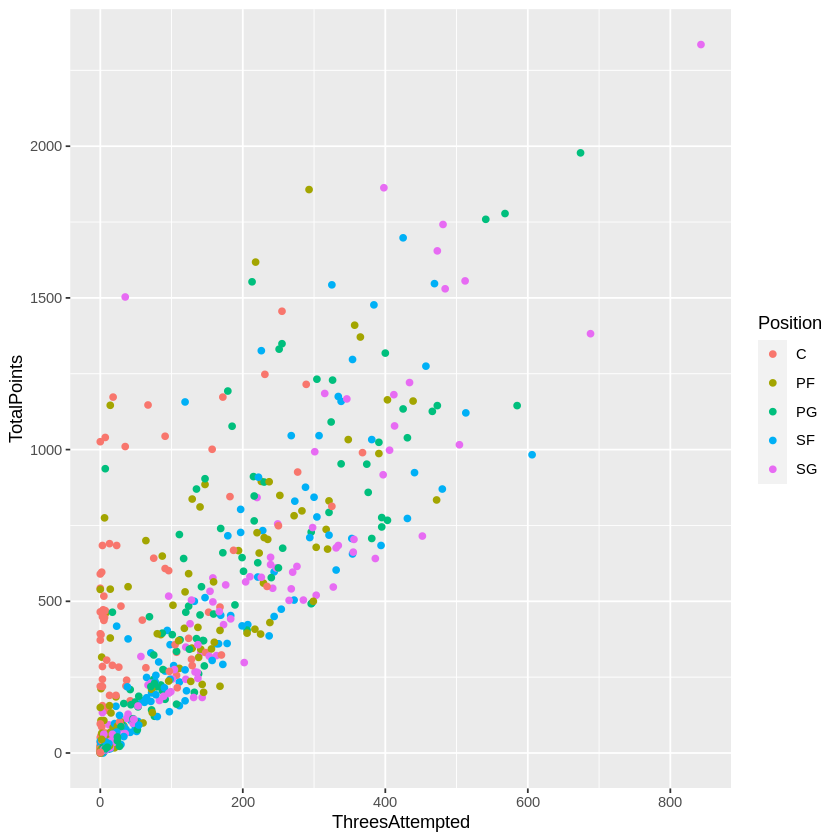

In [7]:
qplot(ThreesAttempted, TotalPoints, data = NBA1920,color=Position)

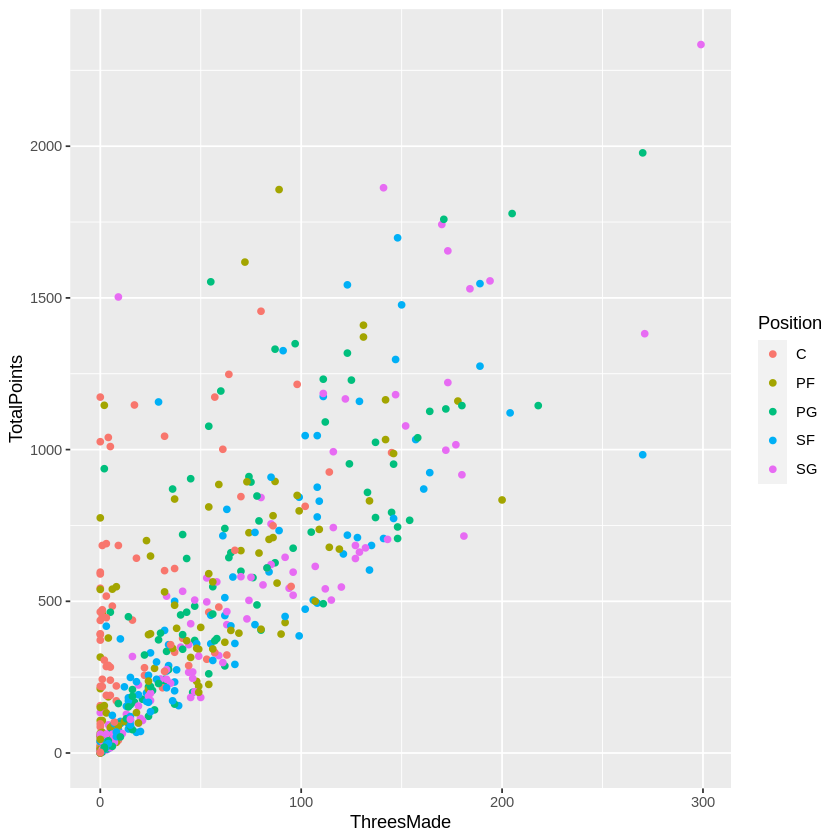

In [8]:
qplot(ThreesMade, TotalPoints, data = NBA1920,color=Position)

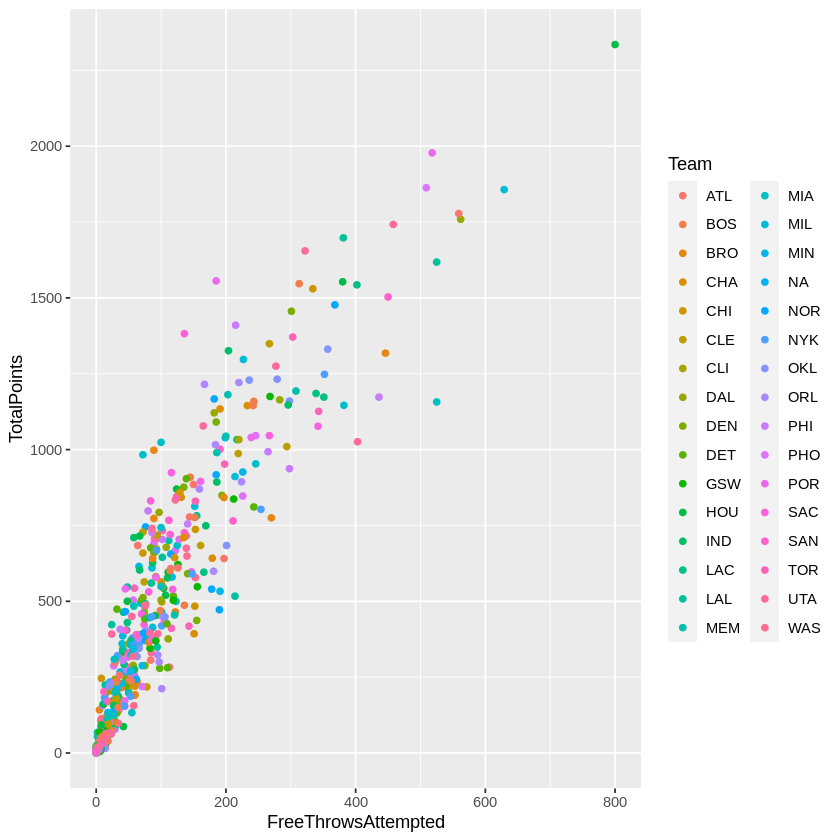

In [9]:
qplot(FreeThrowsAttempted, TotalPoints, data = NBA1920,color=Team)

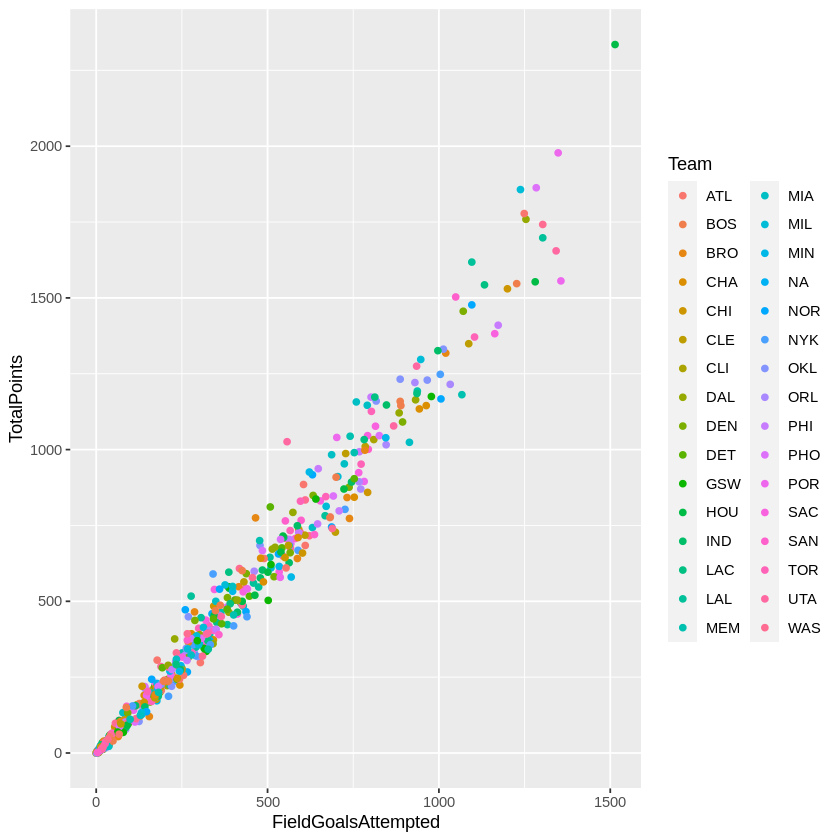

In [10]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1920,color=Team)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



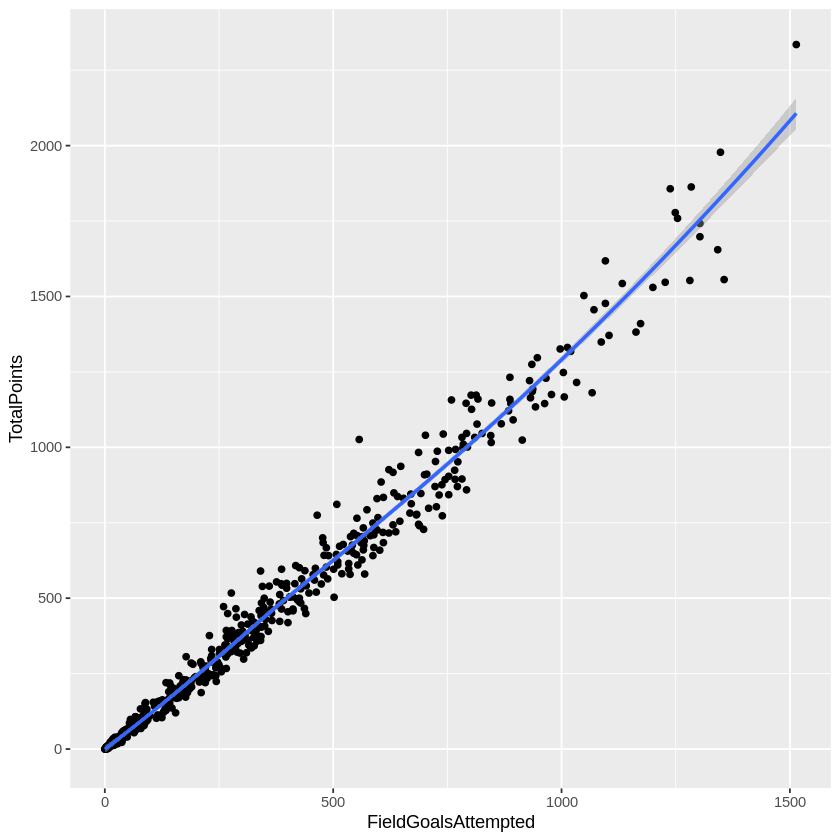

In [11]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1920,
   geom = c("point", "smooth"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



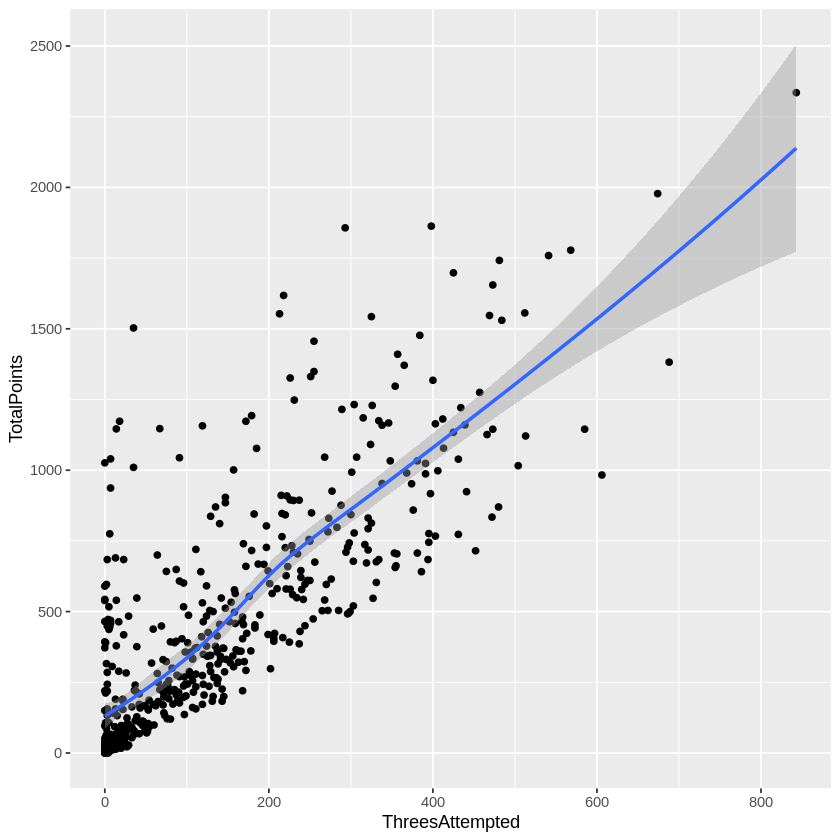

In [12]:
qplot(ThreesAttempted, TotalPoints, data = NBA1920,
   geom = c("point", "smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



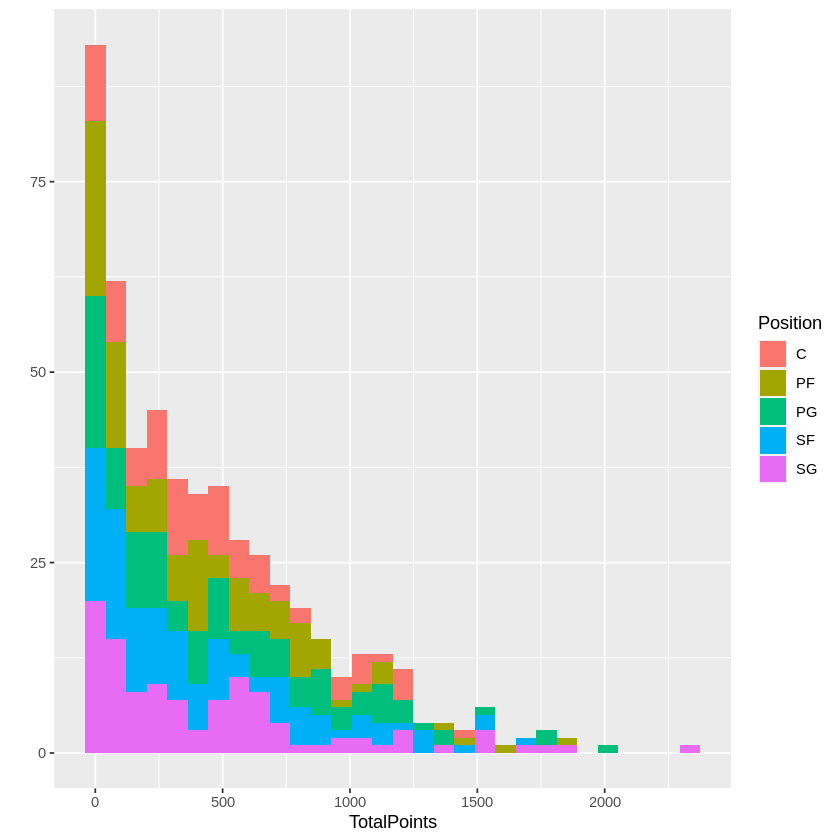

In [13]:
qplot(TotalPoints, data = NBA1920, fill = Position)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



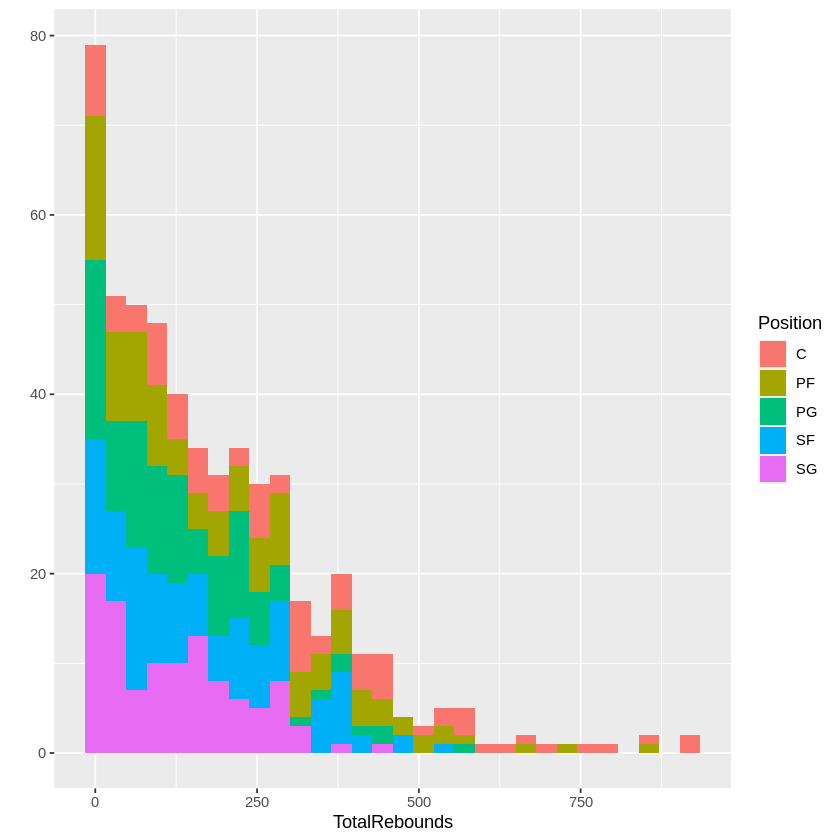

In [14]:
qplot(TotalRebounds, data = NBA1920, fill = Position)

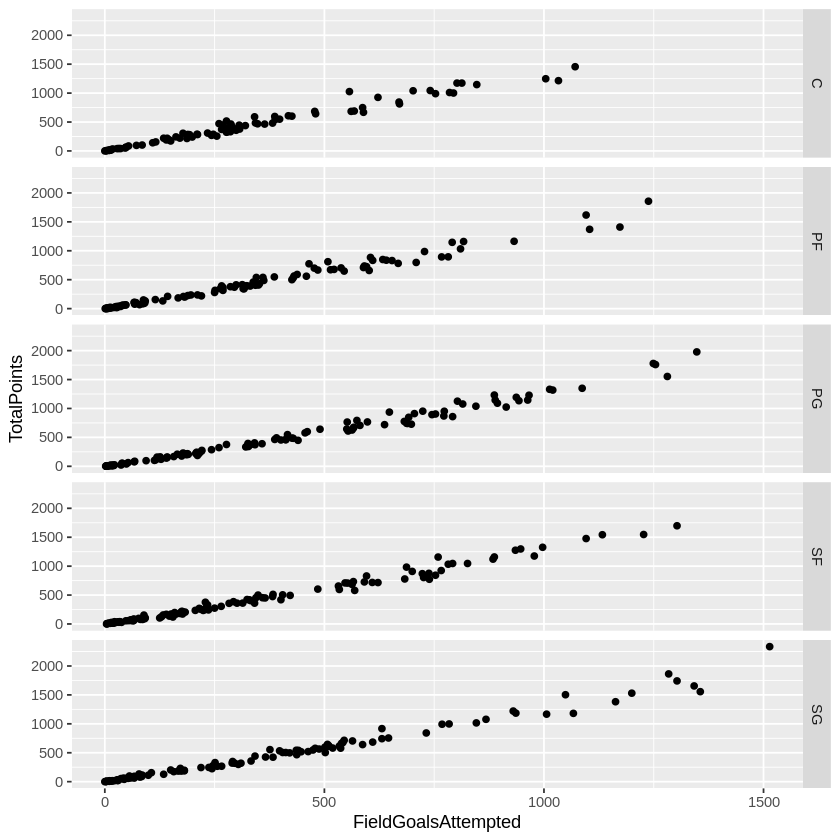

In [15]:
qplot(FieldGoalsAttempted, TotalPoints, 
   data = NBA1920,
   facets = Position ~ .)

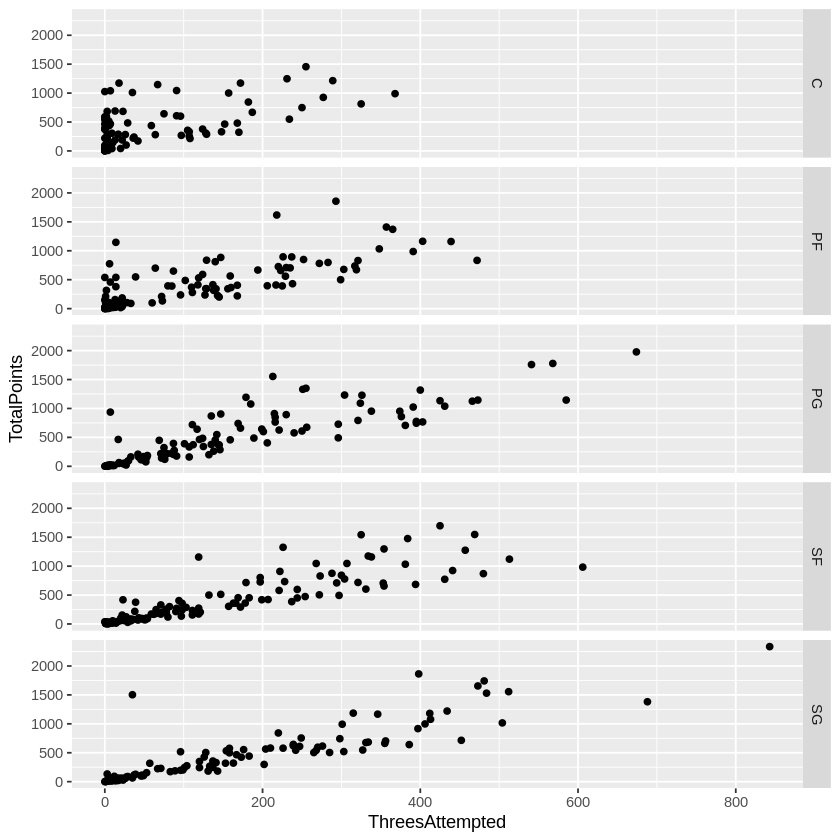

In [16]:
qplot(ThreesAttempted, TotalPoints, 
   data = NBA1920,
   facets = Position ~ .)

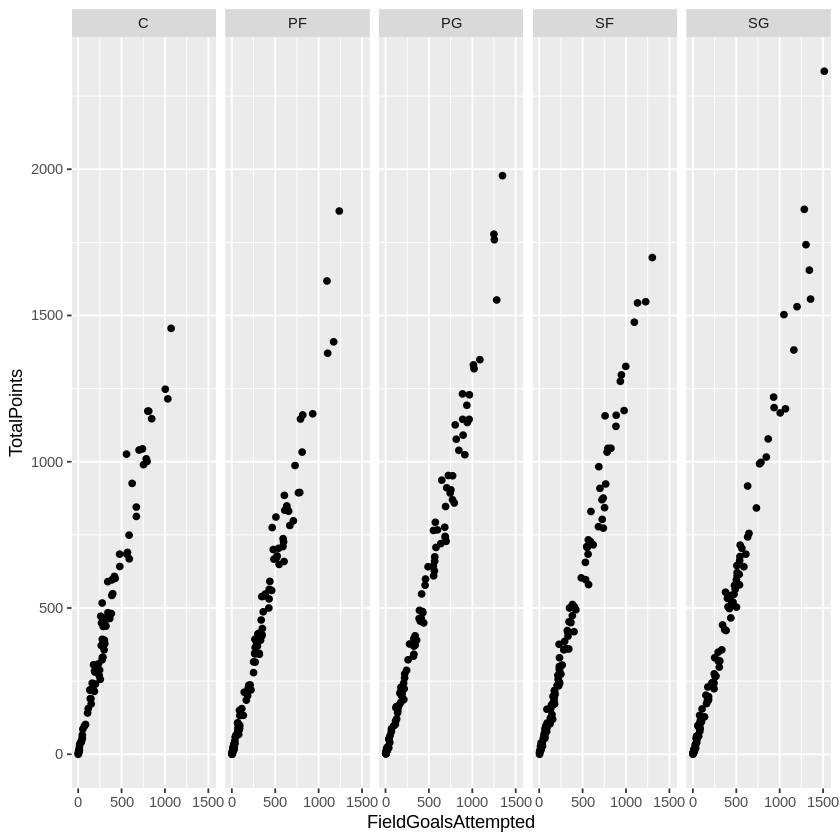

In [17]:
qplot(FieldGoalsAttempted, TotalPoints, 
   data = NBA1920,
   facets = . ~ Position)

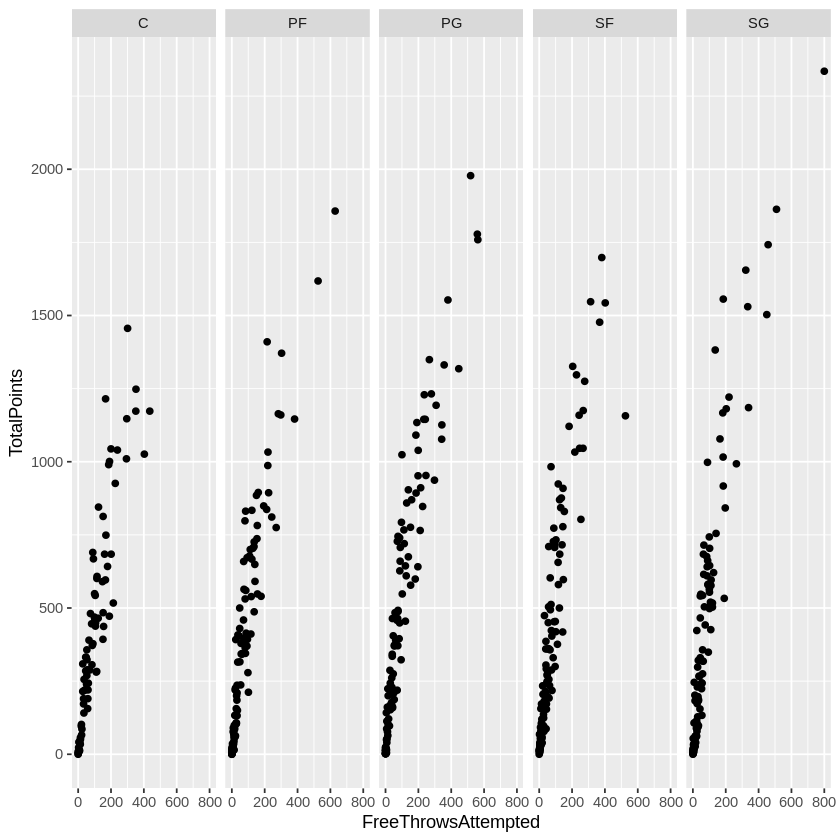

In [18]:
qplot(FreeThrowsAttempted, TotalPoints, 
   data = NBA1920,
   facets = . ~ Position)

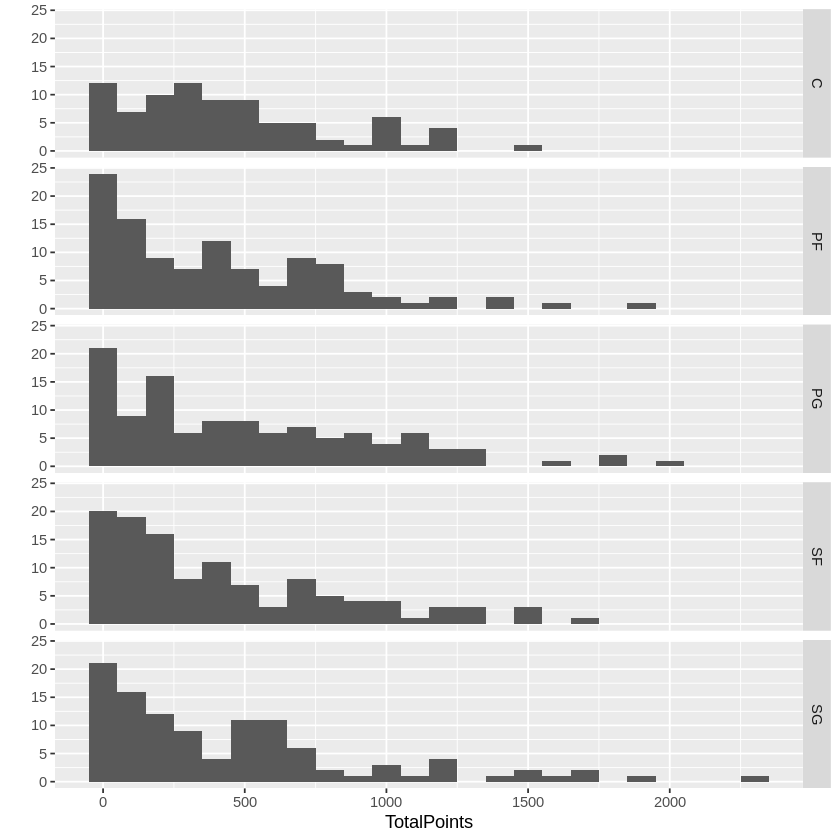

In [19]:
qplot(TotalPoints, data = NBA1920,
   facets = Position ~ ., binwidth = 100)

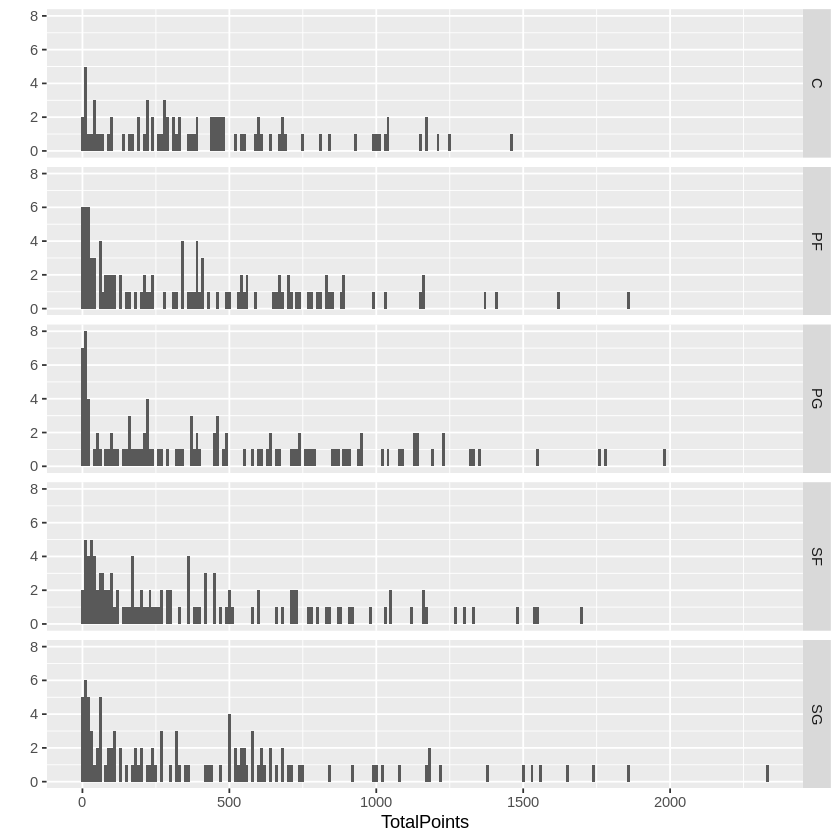

In [20]:
qplot(TotalPoints, data = NBA1920,
   facets = Position ~ ., binwidth = 10)

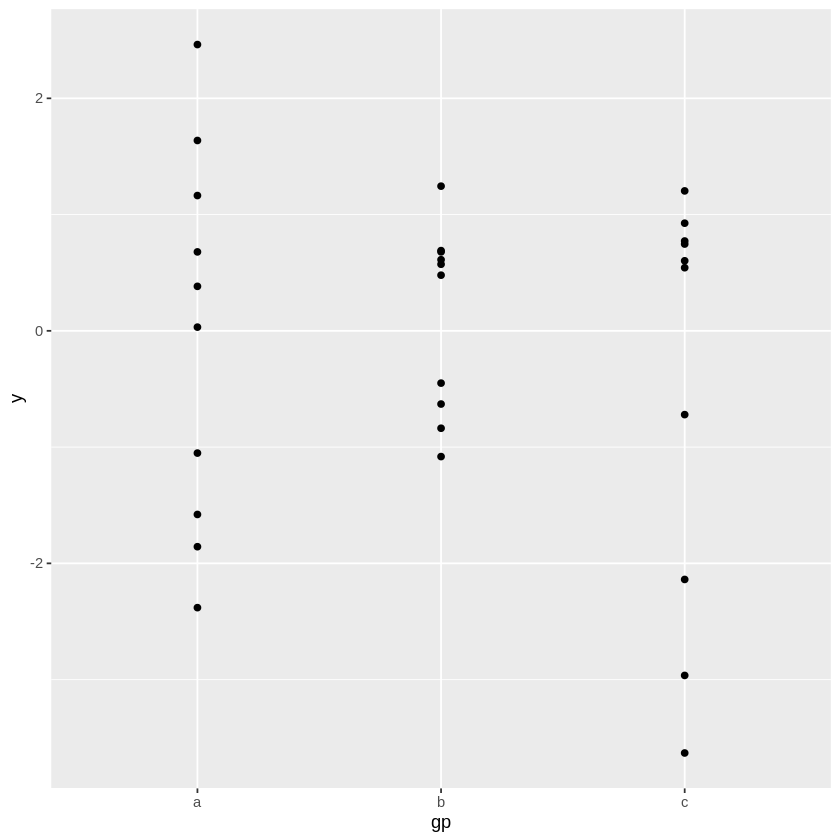

In [21]:
df <- data.frame(gp = factor(rep(letters[1:3], each = 10)),y = rnorm(30))
ggplot(df, aes(x = gp, y = y)) +geom_point() 

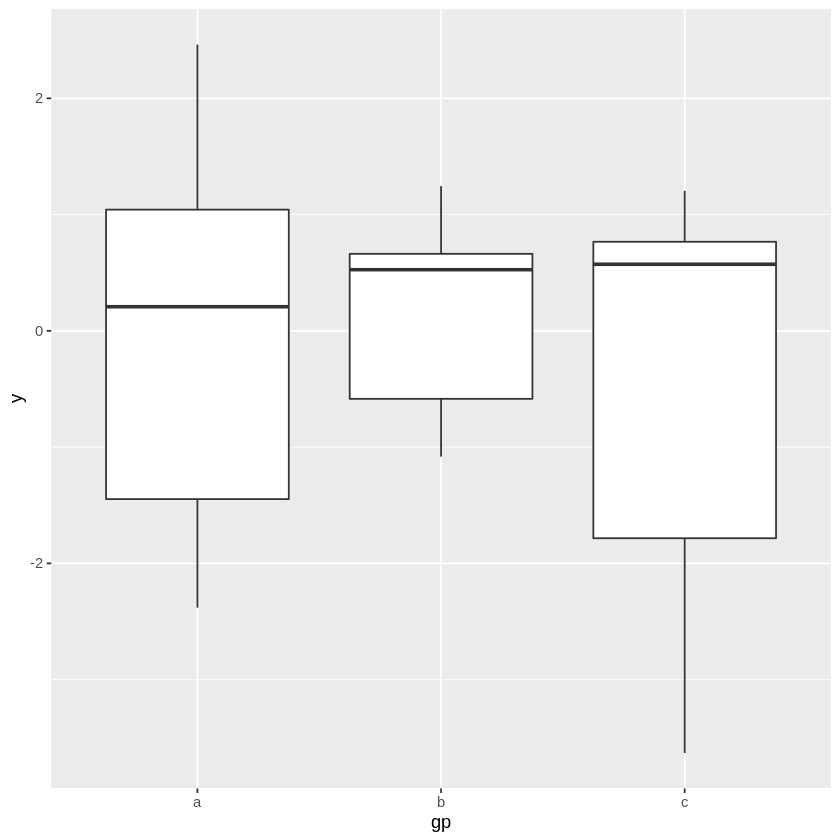

In [22]:
ggplot(df, aes(x = gp, y = y)) +geom_boxplot()

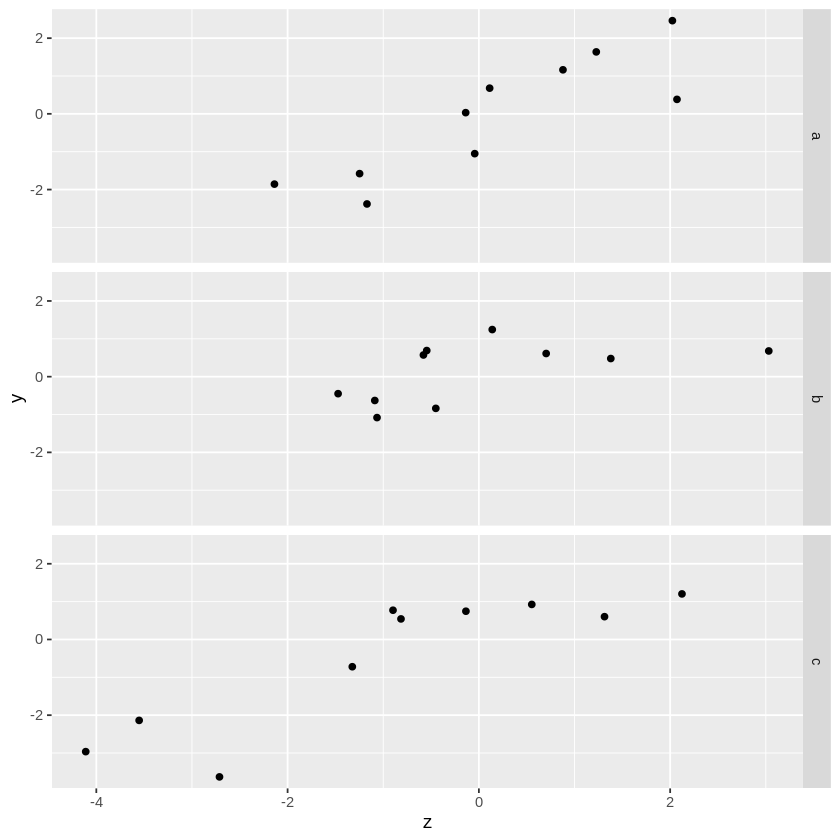

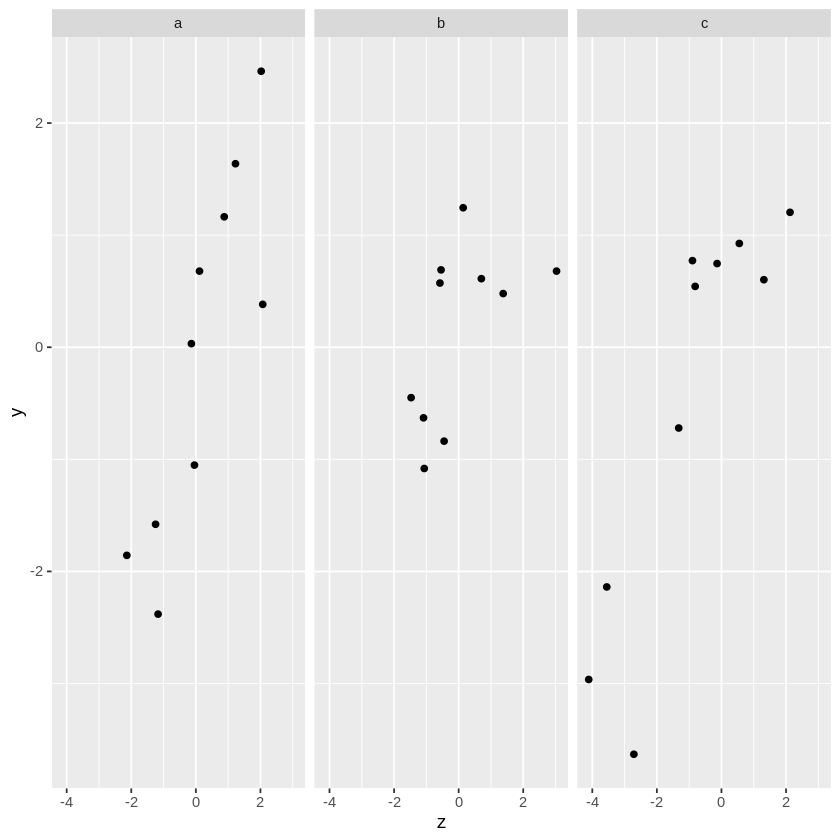

In [23]:
df$z <- df$y+rnorm(30)

ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(gp~.)
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



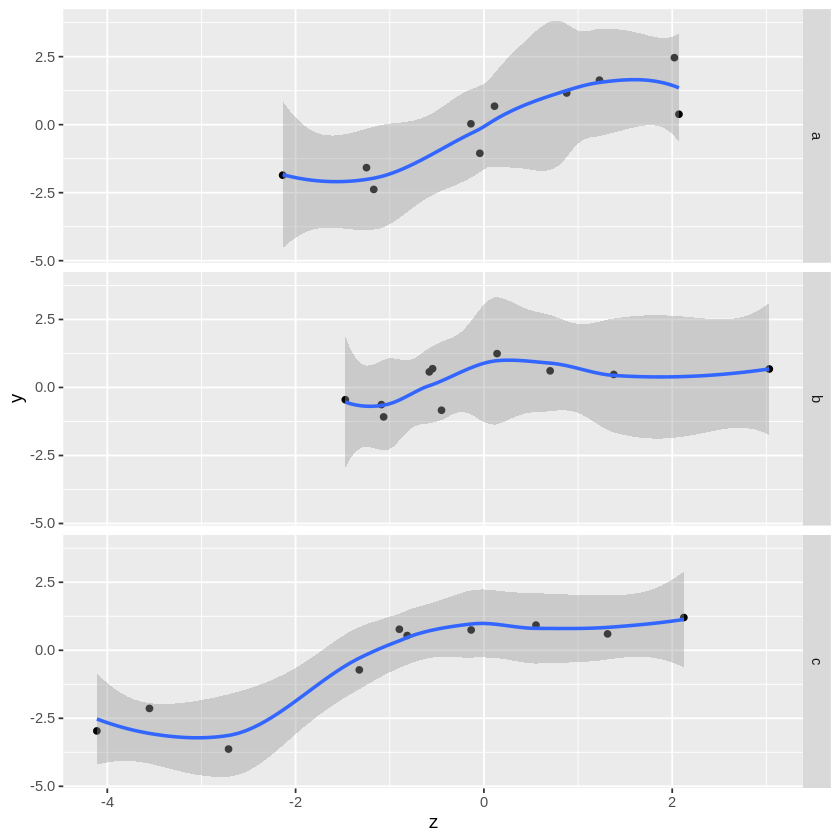

In [24]:
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(gp~.)+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



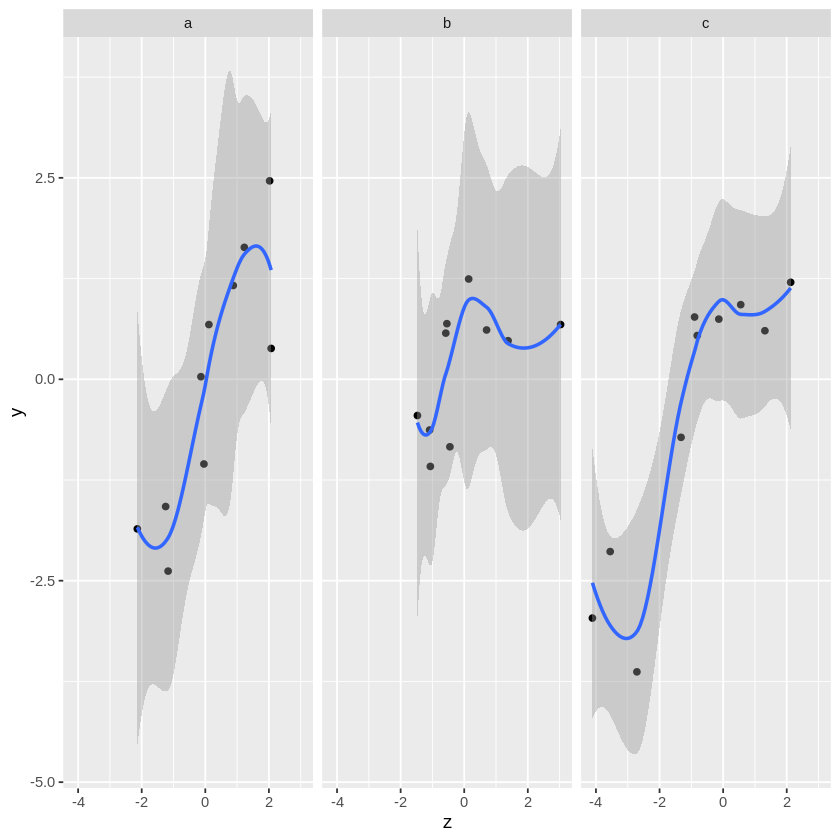

In [25]:
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(.~gp)+geom_smooth()

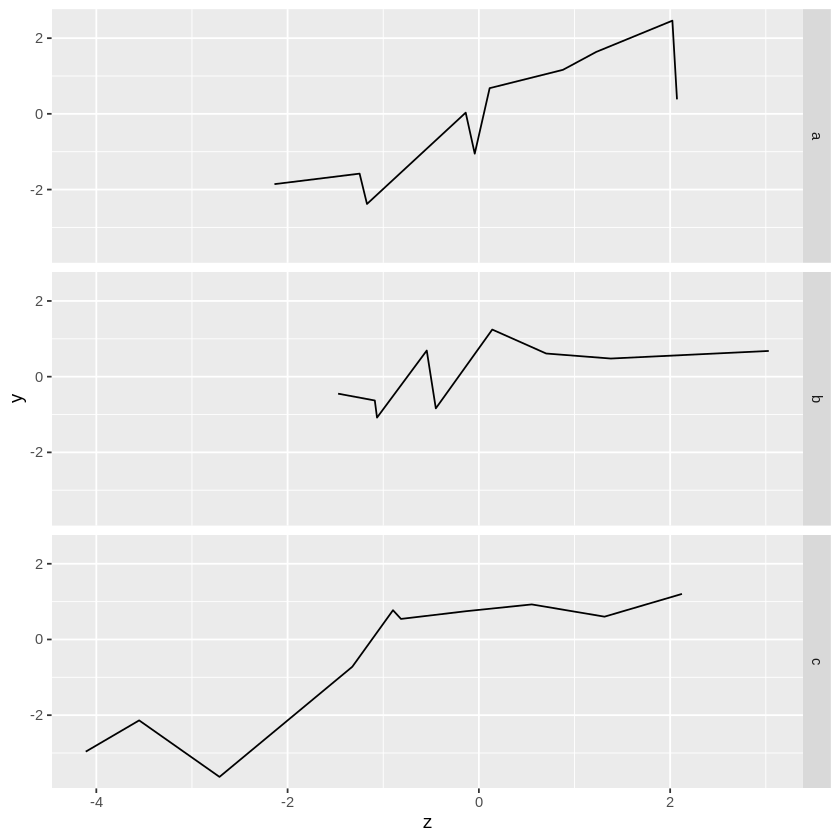

In [26]:
ggplot(df, aes(x = z, y = y)) +geom_line()+facet_grid(gp~.)

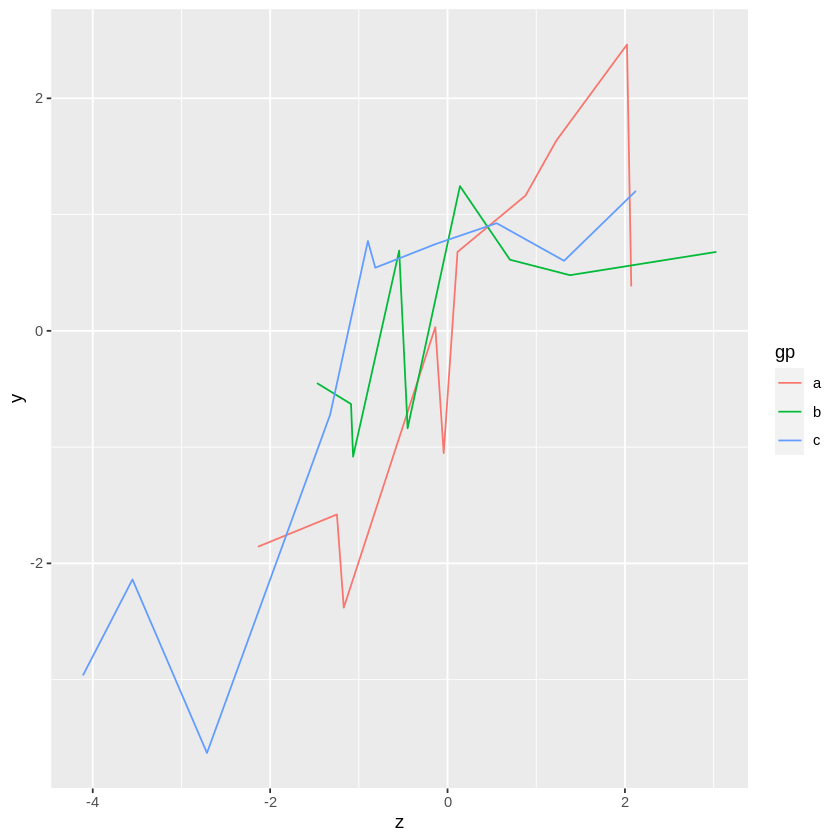

In [27]:
ggplot(df, aes(x = z, y = y, color=gp)) +geom_line()

In [28]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(datasets)
library(data.table)

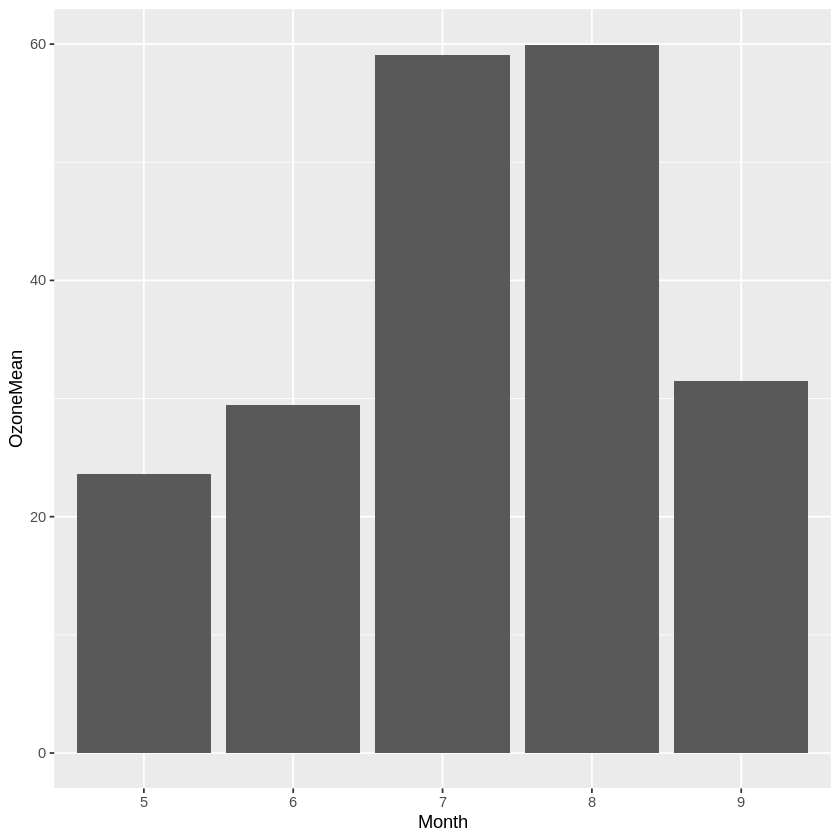

In [30]:
airquality$Month <- as.factor(airquality$Month)
airquality.mean <- data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm = T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat = "identity")

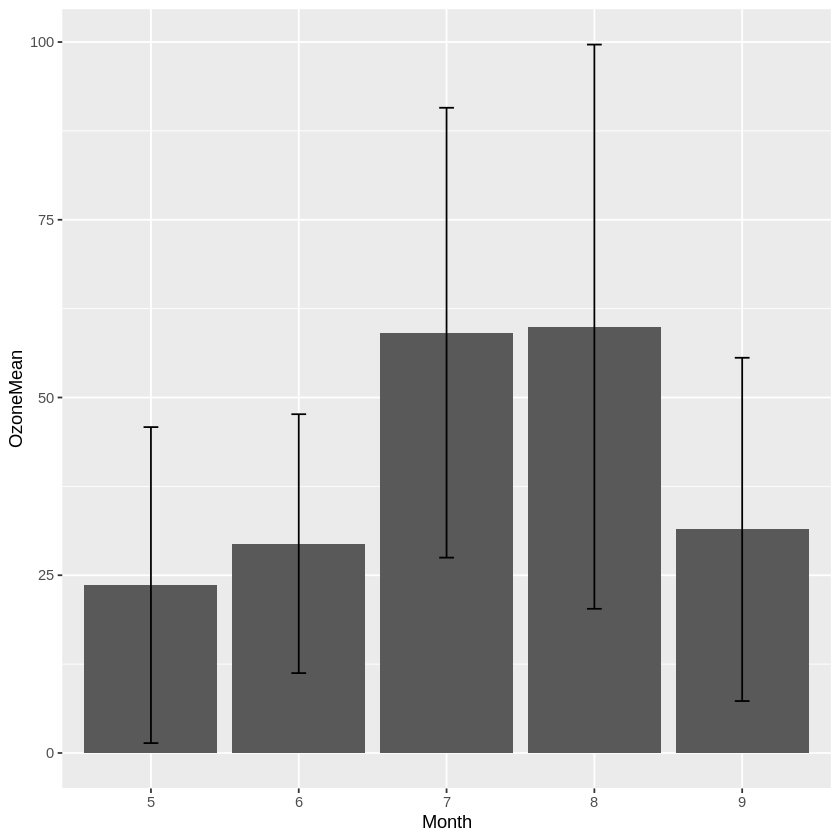

In [31]:
airquality$Month <- as.factor(airquality$Month)
airquality.stat <- data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm = T),
OzoneSD=sd(Ozone,na.rm = T)),by=Month]
ggplot(data=airquality.stat)+geom_bar(aes(x=Month,y=OzoneMean),stat = "identity")+geom_errorbar(
   aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD), width=.1)